In [6]:
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers import Activation, Dense, Dropout, Flatten, InputLayer
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage.io import imsave
import numpy as np
import os
import random

import tensorflow as tf

import PIL
from PIL import Image
import shutil

In [7]:
# collect data - filling an array with images using a loop

data = []
for filename in os.listdir('../images/Images_version_4/Train2/'):
    data.append(img_to_array(load_img('../images/Images_version_4/Train2/'+filename)))
    print(filename)

# convert image array to float array of images
data = np.array(data, dtype=float)

# Set up train data - consider RGB value 255
Xtrain = data
Xtrain = 1.0/255*Xtrain

img_0.jpg
img_1.jpg
img_10.jpg
img_100.jpg
img_1000.jpg
img_1001.jpg
img_1002.jpg
img_1003.jpg
img_1004.jpg
img_1005.jpg
img_1006.jpg
img_1007.jpg
img_1008.jpg
img_1009.jpg
img_101.jpg
img_1010.jpg
img_1011.jpg
img_1012.jpg
img_1013.jpg
img_1014.jpg
img_1015.jpg
img_1016.jpg
img_1017.jpg
img_1018.jpg
img_1019.jpg
img_102.jpg
img_1020.jpg
img_1021.jpg
img_1022.jpg
img_1023.jpg
img_1024.jpg
img_1025.jpg
img_1026.jpg
img_1027.jpg
img_1028.jpg
img_1029.jpg
img_103.jpg
img_1030.jpg
img_1031.jpg
img_1032.jpg
img_1033.jpg
img_1034.jpg
img_1035.jpg
img_1036.jpg
img_1037.jpg
img_1038.jpg
img_1039.jpg
img_104.jpg
img_1040.jpg
img_1041.jpg
img_1042.jpg
img_1043.jpg
img_1044.jpg
img_1045.jpg
img_1046.jpg
img_1047.jpg
img_1048.jpg
img_1049.jpg
img_105.jpg
img_1050.jpg
img_1051.jpg
img_1052.jpg
img_1053.jpg
img_1054.jpg
img_1055.jpg
img_1056.jpg
img_1057.jpg
img_1058.jpg
img_1059.jpg
img_106.jpg
img_1060.jpg
img_1061.jpg
img_1062.jpg
img_1063.jpg
img_1064.jpg
img_1065.jpg
img_1066.jpg
img_1067.jpg
i

img_1631.jpg
img_1632.jpg
img_1633.jpg
img_1634.jpg
img_1635.jpg
img_1636.jpg
img_1637.jpg
img_1638.jpg
img_1639.jpg
img_164.jpg
img_1640.jpg
img_1641.jpg
img_1642.jpg
img_1643.jpg
img_1644.jpg
img_1645.jpg
img_1646.jpg
img_1647.jpg
img_1648.jpg
img_1649.jpg
img_165.jpg
img_1650.jpg
img_1651.jpg
img_1652.jpg
img_1653.jpg
img_1654.jpg
img_1655.jpg
img_1656.jpg
img_1657.jpg
img_1658.jpg
img_1659.jpg
img_166.jpg
img_1660.jpg
img_1661.jpg
img_1662.jpg
img_1663.jpg
img_1664.jpg
img_1665.jpg
img_1666.jpg
img_1667.jpg
img_1668.jpg
img_1669.jpg
img_167.jpg
img_1670.jpg
img_1671.jpg
img_1672.jpg
img_1673.jpg
img_1674.jpg
img_1675.jpg
img_1676.jpg
img_1677.jpg
img_1678.jpg
img_1679.jpg
img_168.jpg
img_1680.jpg
img_1681.jpg
img_1682.jpg
img_1683.jpg
img_1684.jpg
img_1685.jpg
img_1686.jpg
img_1687.jpg
img_1688.jpg
img_1689.jpg
img_169.jpg
img_1690.jpg
img_1691.jpg
img_1692.jpg
img_1693.jpg
img_1694.jpg
img_1695.jpg
img_1696.jpg
img_1697.jpg
img_1698.jpg
img_1699.jpg
img_17.jpg
img_170.jpg
img_1700

img_2252.jpg
img_2253.jpg
img_2254.jpg
img_2255.jpg
img_2256.jpg
img_2257.jpg
img_2258.jpg
img_2259.jpg
img_226.jpg
img_2260.jpg
img_2261.jpg
img_2262.jpg
img_2263.jpg
img_2264.jpg
img_2265.jpg
img_2266.jpg
img_2267.jpg
img_2268.jpg
img_2269.jpg
img_227.jpg
img_2270.jpg
img_2271.jpg
img_2272.jpg
img_2273.jpg
img_2274.jpg
img_2275.jpg
img_2276.jpg
img_2277.jpg
img_2278.jpg
img_2279.jpg
img_228.jpg
img_2280.jpg
img_2281.jpg
img_2282.jpg
img_2283.jpg
img_2284.jpg
img_2285.jpg
img_2286.jpg
img_2287.jpg
img_2288.jpg
img_2289.jpg
img_229.jpg
img_2290.jpg
img_2291.jpg
img_2292.jpg
img_2293.jpg
img_2294.jpg
img_2295.jpg
img_2296.jpg
img_2297.jpg
img_2298.jpg
img_2299.jpg
img_23.jpg
img_230.jpg
img_2300.jpg
img_2301.jpg
img_2302.jpg
img_2303.jpg
img_2304.jpg
img_2305.jpg
img_2306.jpg
img_2307.jpg
img_2308.jpg
img_2309.jpg
img_231.jpg
img_2310.jpg
img_2311.jpg
img_2312.jpg
img_2313.jpg
img_2314.jpg
img_2315.jpg
img_2316.jpg
img_2317.jpg
img_2318.jpg
img_2319.jpg
img_232.jpg
img_2320.jpg
img_2321

img_744.jpg
img_745.jpg
img_746.jpg
img_747.jpg
img_748.jpg
img_749.jpg
img_75.jpg
img_750.jpg
img_751.jpg
img_752.jpg
img_753.jpg
img_754.jpg
img_755.jpg
img_756.jpg
img_757.jpg
img_758.jpg
img_759.jpg
img_76.jpg
img_760.jpg
img_761.jpg
img_762.jpg
img_763.jpg
img_764.jpg
img_765.jpg
img_766.jpg
img_767.jpg
img_768.jpg
img_769.jpg
img_77.jpg
img_770.jpg
img_771.jpg
img_772.jpg
img_773.jpg
img_774.jpg
img_775.jpg
img_776.jpg
img_777.jpg
img_778.jpg
img_779.jpg
img_78.jpg
img_780.jpg
img_781.jpg
img_782.jpg
img_783.jpg
img_784.jpg
img_785.jpg
img_786.jpg
img_787.jpg
img_788.jpg
img_789.jpg
img_79.jpg
img_790.jpg
img_791.jpg
img_792.jpg
img_793.jpg
img_794.jpg
img_795.jpg
img_796.jpg
img_797.jpg
img_798.jpg
img_799.jpg
img_8.jpg
img_80.jpg
img_800.jpg
img_801.jpg
img_802.jpg
img_803.jpg
img_804.jpg
img_805.jpg
img_806.jpg
img_807.jpg
img_808.jpg
img_809.jpg
img_81.jpg
img_810.jpg
img_811.jpg
img_812.jpg
img_813.jpg
img_814.jpg
img_815.jpg
img_816.jpg
img_817.jpg
img_818.jpg
img_819.jpg
i

In [8]:
model = Sequential()
# define an input layer (only once) - input data have shape of 256x256
# be aware that convolutional takes a 3D input so we need to shape to 256x256 and 1 for 1 color space
# specifing input shape sets also the weight for our model

# 1st filter, 2st kernel space (3,3) <-- size of filter
# activation relu -- good for deep learning (tangente)
# padding - output from kernel will decrease - padding does that it will fill up cells with 0's
model.add(Conv2D(8, (3, 3), activation='relu', padding='same',  strides=2, input_shape=(256, 256, 1)))
# strides -> nr or tuple - how much kernel should be moved (2 px)
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

model.compile(optimizer='rmsprop', loss='mse' , metrics=["accuracy"])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 128, 128, 8)       80        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 16)      1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 128, 128, 32)      4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 128)      

In [20]:
# Setup ImageDataGenerator
# How does it work?
#    1) accepting batch of images
#    2) apply random transformation to each image
#    3) replace original batch we newly transformed batch
#    4) train CNN on newly transformed batch

dataGenerator = ImageDataGenerator(
    horizontal_flip=True,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2
)

# define batch size
batch_size = 23

# define function to call ImagedataGenerator
def imageGenerator(batch_size):
    for batch in dataGenerator.flow(Xtrain, batch_size=batch_size):
        # be aware that we have rgb colored photos, to work better we 
        # call rgb2lab function which converts image to a lab image with a b color channel
        # # Lab color, L -> grayscale layer, a b -> color layers (green-red, blue-yellow)
        lab_of_batch = rgb2lab(batch)
        # extract b/w layer for Xbatch
        Xbatch = lab_of_batch[:,:,:,0] # [:,:,:,0] -> select grayscale layer
        # extract two color layer for Ybatch
        # ab spectrum [-128,128] .. divide by 128 to get [-1,1]
        Ybatch = lab_of_batch[:,:,:,1:]/128 # [:,:,:,1] -> select color layer
        # return generator object
        yield(Xbatch.reshape(Xbatch.shape+(1,)), Ybatch)

# Train
filepath = "model_1709.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=0, save_best_only=True, mode='min')
callbacks_list = [checkpoint]

# keras support 3 types of training
#   1.fit, 2. fit_generator, 3. train_on_batch

# to train on large models .fit would not be suitable because RAM overfilled

# .fit_generator - here data is no longer “static” — the data is constantly changing
# Each new batch of data is randomly adjusted according to the parameters supplied to ImageDataGenerator
# .fit_generator accepts the batch of data, performs backpropagation, and updates the weights in our model

# .train_on_batch -- fine-grained control over training your deep learning models - mostly not suitable

history = model.fit_generator(imageGenerator(batch_size), epochs=100, steps_per_epoch=100, verbose=1, callbacks=callbacks_list)

Epoch 1/100
100/100 [==============================] - 93s 933ms/step - loss: 0.0190 - accuracy: 0.7000
Epoch 2/100
100/100 [==============================] - 88s 877ms/step - loss: 0.0189 - accuracy: 0.7026
Epoch 3/100
100/100 [==============================] - 88s 882ms/step - loss: 0.0188 - accuracy: 0.7038
Epoch 4/100
100/100 [==============================] - 88s 877ms/step - loss: 0.0190 - accuracy: 0.6986
Epoch 5/100
100/100 [==============================] - 87s 874ms/step - loss: 0.0186 - accuracy: 0.7015
Epoch 6/100
100/100 [==============================] - 88s 875ms/step - loss: 0.0185 - accuracy: 0.7060
Epoch 7/100
100/100 [==============================] - 88s 876ms/step - loss: 0.0186 - accuracy: 0.7052
Epoch 8/100
100/100 [==============================] - 88s 877ms/step - loss: 0.0186 - accuracy: 0.7076
Epoch 9/100
100/100 [==============================] - 87s 872ms/step - loss: 0.0183 - accuracy: 0.6998
Epoch 10/100
100/100 [==============================] - 87s 874m

100/100 [==============================] - 92s 918ms/step - loss: 0.0169 - accuracy: 0.7179
Epoch 80/100
100/100 [==============================] - 96s 965ms/step - loss: 0.0170 - accuracy: 0.7122
Epoch 81/100
100/100 [==============================] - 91s 907ms/step - loss: 0.0175 - accuracy: 0.7185
Epoch 82/100
100/100 [==============================] - 89s 893ms/step - loss: 0.0166 - accuracy: 0.7111
Epoch 83/100
100/100 [==============================] - 87s 875ms/step - loss: 0.0171 - accuracy: 0.7198
Epoch 84/100
100/100 [==============================] - 87s 875ms/step - loss: 0.0171 - accuracy: 0.7177
Epoch 85/100
100/100 [==============================] - 87s 872ms/step - loss: 0.0168 - accuracy: 0.7149
Epoch 86/100
100/100 [==============================] - 87s 873ms/step - loss: 0.0166 - accuracy: 0.7183
Epoch 87/100
100/100 [==============================] - 87s 872ms/step - loss: 0.0172 - accuracy: 0.7103
Epoch 88/100
100/100 [==============================] - 88s 876ms/st

#### Comparison

1) Batch size = 32, epochs = 10, steps = 100 --- ~15 minutes

Epoch 1/10
100/100 [==============================] - 87s 866ms/step - loss: 0.0440 - accuracy: 0.6563

Epoch 2/10
100/100 [==============================] - 84s 839ms/step - loss: 0.0252 - accuracy: 0.6575

...

Epoch 9/10
100/100 [==============================] - 85s 849ms/step - loss: 0.0237 - accuracy: 0.6596

Epoch 10/10
100/100 [==============================] - 86s 865ms/step - loss: 0.0234 - accuracy: 0.6635
 
___
 
2) Batch size = 32, epochs = 100, steps = 10 --- 

Epoch 1/100
10/10 [==============================] - 11s 1s/step - loss: 0.0228 - accuracy: 0.6684

Epoch 2/100
10/10 [==============================] - 8s 829ms/step - loss: 0.0226 - accuracy: 0.6777

...

Epoch 99/100
10/10 [==============================] - 8s 822ms/step - loss: 0.0216 - accuracy: 0.6735

Epoch 100/100
10/10 [==============================] - 8s 823ms/step - loss: 0.0217 - accuracy: 0.6483




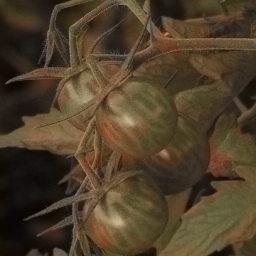

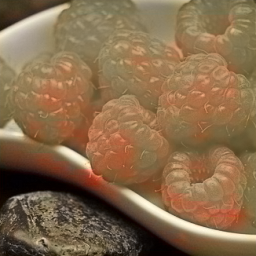

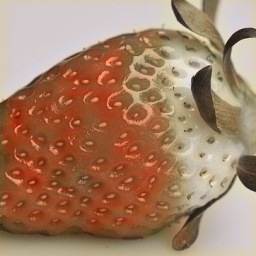

In [3]:
for x in range(3):
    display(Image.open('../images/Images_version_4/Result2/23_10_100/img_' + str(x+7) + '.png'))

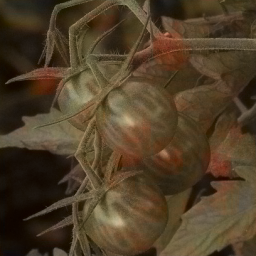

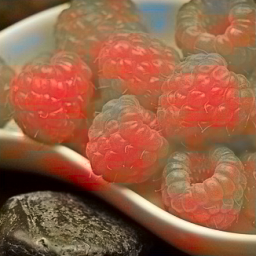

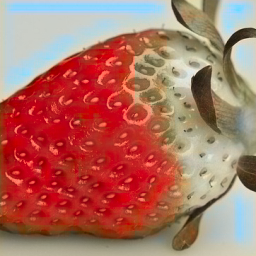

In [4]:
for x in range(3):
    display(Image.open('../images/Images_version_4/Result2/23_100_10/img_' + str(x+7) + '.png'))

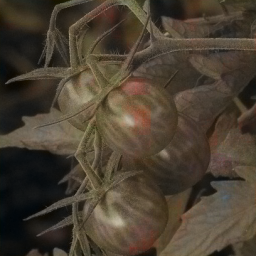

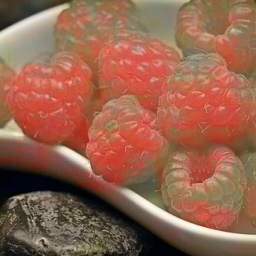

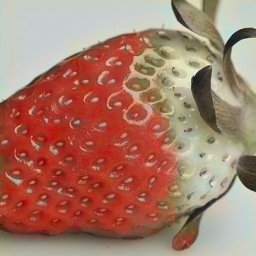

In [14]:
for x in range(3):
    display(Image.open('../images/Images_version_4/Result2/23_10_500/img_' + str(x+7) + '.png'))

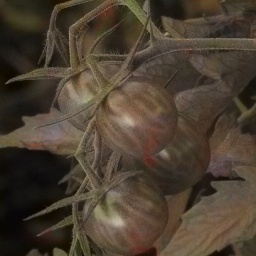

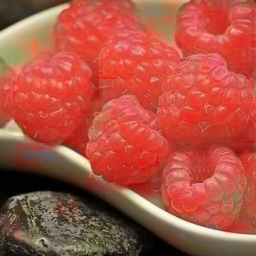

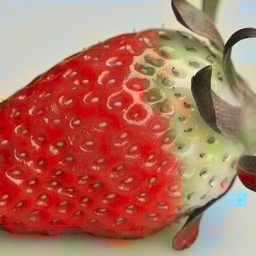

In [25]:
for x in range(3):
    display(Image.open('../images/Images_version_4/Result2/23_100_100/img_' + str(x+7) + '.png'))

dict_keys(['loss', 'accuracy'])


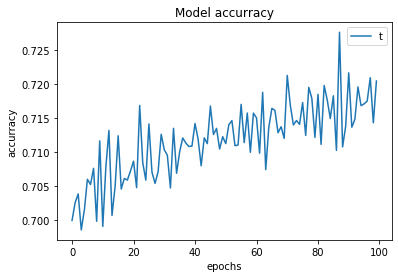

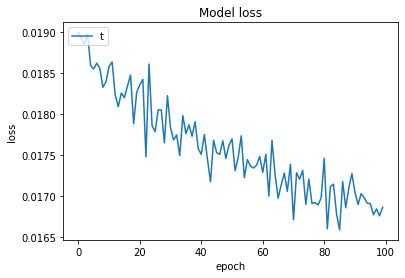

In [21]:
# List all data in history object
print(history.history.keys())

# print accurarcy model with plot
plt.plot(history.history['accuracy'])
plt.title('Model accurracy')
plt.ylabel('accurracy')
plt.xlabel('epochs')
plt.legend('train')
plt.show()

# print history for loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend('train', loc='upper left')
plt.show()

np.save('history_1709_test.npy', history.history)

In [22]:
# Save model
model_json = model.to_json()
with open("model_14_09.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model_14_09.h5")

In [23]:
# load json and create model

from keras.models import model_from_json
json_file = open('model_14_09.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_14_09.h5")

In [24]:
# Colorizer section 
images_to_color = []
for filename in os.listdir('../images/Images_version_4/Test2/'):
    images_to_color.append(img_to_array(load_img('../images/Images_version_4/Test2/'+filename)))

# convert color space, reshape img
images_to_color = np.array(images_to_color, dtype=float)
images_to_color = rgb2lab(1.0/255*images_to_color)[:,:,:,0]
images_to_color = images_to_color.reshape(images_to_color.shape+(1,))

# Test model with predict() function
output = model.predict(images_to_color)

# covert color value back from [-1,1] to [-128,128] which is Lab color spectrum
output = output * 128

# Output colorizations
for i in range(len(output)):
    cur = np.zeros((256, 256, 3))            # make empty 256x256 with 3 layers
    cur[:,:,0] = images_to_color[i][:,:,0]   # copy grayscale layer to new obj
    cur[:,:,1:] = output[i]                  # copy color layer to new obj
    # save img in directory
    imsave("../images/Images_version_4/Result2/img_"+str(i)+".png", lab2rgb(cur))


Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0